# Assignment 1 
### Author: Michael Kurz   
__This verison: March 22, 2020__
   
This notebook is part the of IBM's professional certificate Data Science Cap Stone project.

## Part III:
Let's start by importing some libraries.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
from sklearn.cluster import KMeans

import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import requests

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import folium # Libarary that contains a detailed world map and the ability to zoom in down to the city level
from geopy.geocoders import Nominatim # reverse geocoder API to get coordinates for addresses/cites, etc.

print('All libraries are loaded.')

All libraries are loaded.


I use the dataframe that I created in the Part II notebook of this assignment.

In [2]:
dfALL = pd.read_csv(r'Toronto_PostalCodes_with_Coordinates.csv')
dfALL

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park / Ontario Provincial Government,Queen's Park / Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
7,M3B,North York,Don MillsNorth,43.745906,-79.352188
8,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [3]:
print('The full dataset has {} post code areas.'.format(dfALL.shape[0]))

The full dataset has 103 post code areas.


Let's restrict the dataset to only those boroughs that contain the word Toronto. This should exclude more "suburbian" areas. Let's call that main Toronto (disclaimer I am not from Toronto and have never been there, so I am just guessing). 

In [4]:
dfToronto = dfALL[dfALL['Borough'].str.contains('Toronto')].reset_index(drop=True)
dfToronto

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568
8,M6H,West Toronto,"Dufferin , Dovercourt Village",43.669005,-79.442259
9,M4J,East YorkEast Toronto,The Danforth East,43.685347,-79.338106


In [5]:
print('The main Toronto dataset has {} post code areas.'.format(dfToronto.shape[0]))

The main Toronto dataset has 39 post code areas.


I go on with the main Toronto dataset and keep the analysis close to the New York lab example.

### Creating an interactive map of Toronto, Ontario   
I use the folium library to render a map of Toronto and overlay the map with markers for the geographical location of the boroughs from the Toronto dataset.   
   
Folium is essentially a world map. To pull up a map of Toronto it is necessary to zoom in at the coordinates of the city of Toronto. I use geopy.geolocator to get the coordinates of Toronto.

In [6]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent = 'Toronto_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical cooridnates of Toronto, Ontario are Latitude: {}, Longitude: {}.'.format(latitude,longitude))

The geographical cooridnates of Toronto, Ontario are Latitude: 43.653963, Longitude: -79.387207.


Now use folium to pull up a map of Toronto, Onatario centered around the geographical coordinates.

In [7]:
map_toronto = folium.Map(location = [latitude, longitude], zoom_start=12, control_scale=True)

for lat, lng, postcode, borough, neighborhood in zip(dfToronto['Latitude'], dfToronto['Longitude'], dfToronto['PostalCode'], dfToronto['Borough'], dfToronto['Neighborhood']):
    label = '{}, {}, {}'.format(neighborhood,borough, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_toronto)

map_toronto # bring up the map

# Get Fouresquare location data

I load the credientials for the Fouresquare API from an self-created JSON file that I store locally and put them in a dictonary. I use this to be able to publish this notebook on GitHub unmodified without having to publish my log-in credentials. There are more elegant ways of doing this (for example via environment variables) but this was the 'fast and easy' solution for me for me now.

In [8]:
with open(r'C:\Users\michael.kurz\Documents\Git_projects\Foursquare_Credentials.json') as f:
    data = json.load(f)
    fSqure_credentials = {'CLIENT_ID':data['CLIENT_ID'],'CLIENT_SECRET':data['CLIENT_SECRET'],'VERSION':data['VERSION']}

For each post code area in Toronto I want to download a list of venues. I limit the number of venues to the top 100 venues per post code area. For each post code area it is necessary to decide on the radius around the geographical coordinate of the post code area (which should be the center of the post code area). I choose a radius of 800 meters around the geographical coordinate of the post code area. Looking at the scale of the map above this seems like a reasonable radius.

In [9]:
venues_list = []
myRadius = 800
myLimit = 100

# loop through all post code areas in the dataset and get Foursquare data for each post code area
for postalcode, borough, neighborhood, lat, lng in zip(dfToronto['PostalCode'], dfToronto['Borough'], dfToronto['Neighborhood'], dfToronto['Latitude'], dfToronto['Longitude']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    fSqure_credentials['CLIENT_ID'],
    fSqure_credentials['CLIENT_SECRET'],
    fSqure_credentials['VERSION'],
    lat,
    lng,
    myRadius,
    myLimit)
    results = requests.get(url).json()
    loc_venue = results['response']['groups'][0]['items']
    venues_list.append([(postalcode,borough, lat, lng, neighborhood, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],v['venue']['categories'][0]['name']) for v in loc_venue])

# Process location

I transform the list containg the venues data into a dataframe for easier handling.

In [10]:
toronto_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
toronto_venues.columns = ['Postal Code', 'Borough', 
                  'Postal Code Latitude', 
                  'Postal Code Longitude',
                  'Neighborhoods',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

toronto_venues.head()

,Postal Code,Borough,Postal Code Latitude,Postal Code Longitude,Neighborhoods,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M5A,Downtown Toronto,43.65426,-79.360636,"Regent Park , Harbourfront",Roselle Desserts,43.653447,-79.362017,Bakery
1,M5A,Downtown Toronto,43.65426,-79.360636,"Regent Park , Harbourfront",Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,M5A,Downtown Toronto,43.65426,-79.360636,"Regent Park , Harbourfront",Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,M5A,Downtown Toronto,43.65426,-79.360636,"Regent Park , Harbourfront",Body Blitz Spa East,43.654735,-79.359874,Spa
4,M5A,Downtown Toronto,43.65426,-79.360636,"Regent Park , Harbourfront",Impact Kitchen,43.656369,-79.356980,Restaurant


Let's check dimensions of the new dataframe

In [11]:
print('The dataframe has {} rows and {} columns.'.format(toronto_venues.shape[0],toronto_venues.shape[1]))
print('There are {} unique venue categories and {} unique venues in the dataframe.'.format(len(toronto_venues['Venue Category'].unique()),len(toronto_venues['Venue'].unique())))

The dataframe has 2788 rows and 9 columns.
There are 290 unique venue categories and 1780 unique venues in the dataframe.


In [12]:
venue_counts = toronto_venues.groupby('Postal Code').count()
venue_counts['Borough']

Postal Code
M4E     51
M4J     54
M4K    100
M4L     52
M4M    100
M4N      7
M4P     57
M4R     33
M4S     92
M4T     13
M4V     67
M4W      8
M4X     69
M4Y    100
M5A     83
M5B    100
M5C    100
M5E    100
M5G    100
M5H    100
M5J    100
M5K    100
M5L    100
M5N      3
M5P     14
M5R     82
M5S    100
M5T    100
M5V     28
M5W    100
M5X    100
M6G     63
M6H     44
M6J    100
M6K    100
M6P     69
M6R     72
M6S     67
M7Y     60
Name: Borough, dtype: int64

I create dummy variables for the various venue categories as preparation for the actual analysis.

In [13]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix='', prefix_sep='')
toronto_onehot['Postal Code'] = toronto_venues['Postal Code']
toronto_onehot.head()

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()

,Postal Code,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Social Club,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Transportation Service,Tunnel,Tu

In [14]:
toronto_onehot.shape

(2788, 291)

# Post code area characteristic

Let's look into the frequency of occurance of various venue categories per post code area.

In [15]:
toronto_grouped = toronto_onehot.groupby('Postal Code').mean().reset_index()
toronto_grouped.head()

,Postal Code,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Festival,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Social Club,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Transportation Service,Tunnel,Tu

In [16]:
toronto_grouped.shape

(39, 291)

Let's check whether I lost some post code areas...

In [17]:
np.setdiff1d(dfToronto['PostalCode'],toronto_grouped['Postal Code'], assume_unique=True)

array([], dtype=object)

All post code areas are still around.

# Top venue categories

Let's check the top 10 venue categories for each post code area:

In [18]:
num_top_venues = 20
for postcode in toronto_grouped['Postal Code']:
    print('-------'+postcode+'-------')
    temp = toronto_grouped[toronto_grouped['Postal Code'] == postcode].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')    

-------M4E-------
                            venue  freq
0                             Pub  0.10
1                          Bakery  0.04
2                     Coffee Shop  0.04
3                  Breakfast Spot  0.04
4                  Sandwich Place  0.04
5                   Grocery Store  0.04
6                             Bar  0.04
7               Health Food Store  0.04
8                       Gastropub  0.04
9             Japanese Restaurant  0.04
10  Vegetarian / Vegan Restaurant  0.02
11              Indian Restaurant  0.02
12                  Women's Store  0.02
13                 Ice Cream Shop  0.02
14       Mediterranean Restaurant  0.02
15                   Neighborhood  0.02
16        Fruit & Vegetable Store  0.02
17                       Tea Room  0.02
18               Greek Restaurant  0.02
19                    Pizza Place  0.02


-------M4J-------
                        venue  freq
0                        Café  0.09
1                 Coffee Shop  0.07
2             

                     venue  freq
0              Coffee Shop  0.07
1               Restaurant  0.05
2                     Café  0.05
3                Gastropub  0.03
4                  Theater  0.03
5                      Gym  0.03
6                    Hotel  0.03
7              Pizza Place  0.03
8      American Restaurant  0.02
9         Asian Restaurant  0.02
10                     Bar  0.02
11          Cosmetics Shop  0.02
12                  Bakery  0.02
13        Sushi Restaurant  0.02
14  Furniture / Home Store  0.02
15           Movie Theater  0.02
16            Concert Hall  0.02
17         Thai Restaurant  0.02
18              Steakhouse  0.02
19      Seafood Restaurant  0.02


-------M5J-------
                  venue  freq
0           Coffee Shop  0.10
1                 Hotel  0.08
2            Restaurant  0.05
3                  Café  0.04
4   Japanese Restaurant  0.04
5                  Park  0.03
6        Scenic Lookout  0.03
7    Italian Restaurant  0.03
8          Concer

19        Clothing Store  0.02




This seems useful but it's diffuclt see anything in this view.

I create a dataframe that contains the top 20 venue categories per post code area for better overview.

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 20

# create columns according to number of top venues
columns = ['Postal Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postcode_venues_sorted = pd.DataFrame(columns=columns)

postcode_venues_sorted['Postal Code'] = toronto_grouped['Postal Code']

for ind in np.arange(toronto_grouped.shape[0]):
    postcode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

postcode_venues_sorted.head()

,Postal Code,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,M4E,Pub,Sandwich Place,Grocery Store,Bakery,Bar,Coffee Shop,Breakfast Spot,Gastropub,Health Food Store,Japanese Restaurant,Ice Cream Shop,Indian Restaurant,Beach,Indie Movie Theater,Church,Ramen Restaurant,Juice Bar,Bagel Shop,Chocolate Shop,Mexican Restaurant
1,M4J,Café,Coffee Shop,Pizza Place,Convenience Store,Breakfast Spot,Greek Restaurant,Fast Food Restaurant,Park,Beer Bar,Pub,Gastropub,Rental Car Location,Karaoke Bar,Bookstore,Beer Store,Diner,Restaurant,Spa,Chinese Restaurant,Liquor Store
2,M4K,Greek Restaurant,Coffee Shop,Pub,Café,Grocery Store,Spa,Ice Cream Shop,Italian Restaurant,Fast Food Restaurant,Bookstore,Breakfast Spot,Park,Pizza Place,Bakery,Discount Store,Fruit & Vegetable Store,Furniture / Home Store,Bank,Yoga Studio,Fish & Chips Shop
3,M4L,Indian Restaurant,Gym,Coffee Shop,Fast Food Restaurant,Brewery,Sandwich Place,Café,Grocery Store,Burrito Place,Steakhouse,Fish & Chips Shop,Pakistani Restaurant,Park,Liquor Store,Pet Store,Snack Place,Burger Joint,Skate Park,Diner,Bus Stop
4,M4M,Café,Coffee Shop,Bakery,Bar,Brewery,Sandwich Place,Diner,Pizza Place,Park,Italian Restaurant,American Restaurant,Sushi Restaurant,Arts & Crafts Store,Latin American Restaurant,Furniture / Home Store,Vietnamese Restaurant,Gym / Fitness Center,Gastropub,Comfort Food Restaurant,Convenience Store


This look more useful. There seems to be some variation in the types of venues in each post code area.

# Finding clusters of similar post code areas

First, I try to find clusters via Kmeans clustering. This requires to identify the optimal number of clusters. I attempt to do this in two ways: (i) via the silhouette score and (ii) via the Elbow plot.   
Note that I exclude the trivial case of k=1 (i.e. there are no distinct clusters).

In [21]:
toronto_grouped_clustering = toronto_grouped.drop('Postal Code', 1)

For k = 2 The average silhouette_score is: 0.6257917021688721
For k = 3 The average silhouette_score is: 0.4779329875606821
For k = 4 The average silhouette_score is: 0.41967318295184997
For k = 5 The average silhouette_score is: 0.3913600072189319
For k = 6 The average silhouette_score is: 0.38284914594304487
For k = 7 The average silhouette_score is: 0.0808439113144753
For k = 8 The average silhouette_score is: 0.08044519727326124
For k = 9 The average silhouette_score is: 0.06371690944060453
For k = 10 The average silhouette_score is: 0.09027460358918758
For k = 11 The average silhouette_score is: 0.07269484188254871
For k = 12 The average silhouette_score is: 0.06662839839800924
For k = 13 The average silhouette_score is: 0.07523361946330384
For k = 14 The average silhouette_score is: 0.07836538523373376


The highest silhouette scores of [0.6257917021688721] is reached for k = 2


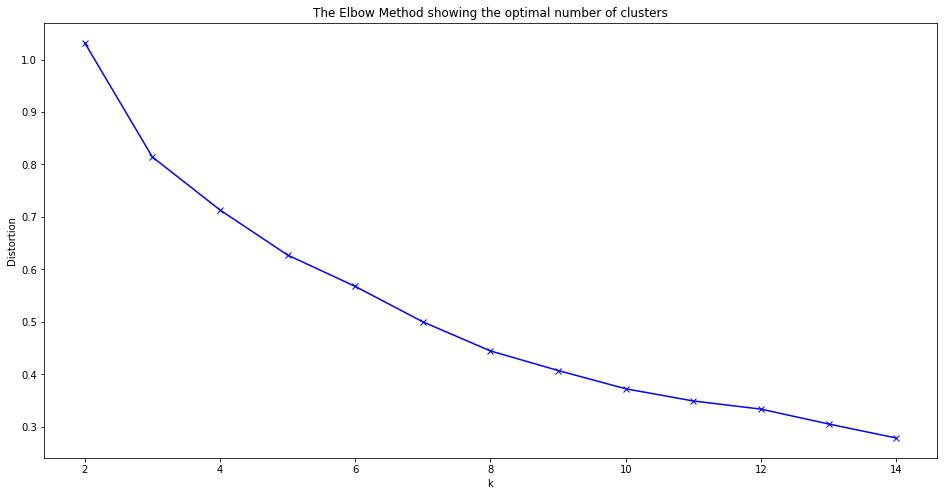

In [22]:
from sklearn.metrics import silhouette_score
distortions = []
K = range(2,15)
silhouette_scores = []

for k in K:
    KmeanMod = KMeans(n_clusters = k, random_state=10)
    KmeanTemp = KmeanMod.fit(toronto_grouped_clustering)
    distortions.append(KmeanTemp.inertia_)
    cluster_labels = KmeanMod.fit_predict(toronto_grouped_clustering)
    silhouette_avg = silhouette_score(toronto_grouped_clustering, cluster_labels)
    silhouette_scores.append([silhouette_avg])
    print('For k = {} The average silhouette_score is: {}'.format(k, silhouette_avg))

print('\n')    
print('The highest silhouette scores of {} is reached for k = {}'.format(max(silhouette_scores),np.argmax(silhouette_scores)+2))
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

Based on the silhouette scores k=2 is the best number of clusters. In other words there are only 2 clusters  of similar post code areas in Toronto.   
   
Next, let's inspect the elbow plot. It is rather smooth and shows no obvious 'elbow'. The smooth elbow plot could be an indication of the Kmeans not being the right model to cluster the Toronto postal code areas. This does not mean that there are no clusters (or only 2 clusters for that matter) but it could mean that the Kmeans algorithm simply cannot separate clusters. 
    
Since the data and analysis are spatial in nature, I believe that next best alternative algorithm would be DBSCAN. 

For the sake of this assignment I'll go on with Kmeans to stay close to the analysis for New York that is shown in the course example. However, I'll add an analysis using DBSCAN below. But for now the Kmeans clustering:

# Illustrative example: Cluster post code areas via Kmeans

Even though the above analysis does not support, I am going ahead with Kmeans using 5 clusters for illustrative purposes.

In [29]:
# set number of clusters (more or less arbitrary)
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=10).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_ 
np.unique(labels)

array([0, 1, 2, 3, 4])

In [30]:
# add clustering labels
postcode_venues_sorted_labled = postcode_venues_sorted
postcode_venues_sorted_labled.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = dfToronto
toronto_merged = toronto_merged.rename(columns={'PostalCode':'Postal Code'})

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(postcode_venues_sorted_labled.set_index('Postal Code'), on='Postal Code')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,1,Coffee Shop,Pub,Park,Theater,Restaurant,Italian Restaurant,Bakery,Café,Mexican Restaurant,Cosmetics Shop,Thai Restaurant,Performing Arts Venue,Mediterranean Restaurant,French Restaurant,Pharmacy,Liquor Store,Karaoke Bar,Pool,Ice Cream Shop,Hotel
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Clothing Store,Japanese Restaurant,Diner,Italian Restaurant,Middle Eastern Restaurant,Restaurant,Bookstore,Cosmetics Shop,Electronics Store,Theater,American Restaurant,Gastropub,Department Store,Gym,Hotel,Plaza,Ramen Restaurant,Park,Café
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Restaurant,Seafood Restaurant,Bakery,Italian Restaurant,Hotel,Breakfast Spot,Cosmetics Shop,Clothing Store,Creperie,Gastropub,Thai Restaurant,Theater,BBQ Joint,Japanese Restaurant,Gym,Cocktail Bar,Beer Bar,Farmers Market
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Pub,Sandwich Place,Grocery Store,Bakery,Bar,Coffee Shop,Breakfast Spot,Gastropub,Health Food Store,Japanese Restaurant,Ice Cream Shop,Indian Restaurant,Beach,Indie Movie Theater,Church,Ramen Restaurant,Juice Bar,Bagel Shop,Chocolate Shop,Mexican Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Beer Bar,Cheese Shop,Pub,Cocktail Bar,BBQ Joint,Seafood Restaurant,Farmers Market,Breakfast Spot,Italian Restaurant,Sporting Goods Shop,Park,Bakery,Creperie,Gastropub,French Restaurant


In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, control_scale=True)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Postal Code'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The visualization of the Kmeans clusters also supports the conclusion that Kmeans may not be separating clusters well. However, it may also be that indeed most post code areas are very similar with only few 'outlier' post code areas. Overall, I am not very confident regarding the results. So, instead of going deeper into the clusters I proceed with looking into DBSCAN.

# Run clustering with DBSCAN

In [32]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

DBSCAN requires to determine a parameter eqsilon. 

I use the approach descibed in [this](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) paper (summarized in this [blog](https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc)).   
   
In short: I find the value for epsilon by calculating the distance to the nearest 2 post codes for each post code, sorting and plotting the results. Then I look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as epsilon. Note that 'distance' here is not the geographical distance between post code areas but their distance in terms of their profile of top venue categories.

In [33]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(toronto_grouped_clustering)
distances, indices = nbrs.kneighbors(toronto_grouped_clustering)

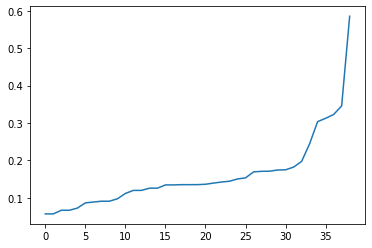

In [34]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The best value of epsilon is found at the point of maximum curvature in the above graph. I will set epsilon to 0.4.   
   
I rub DBSCAN with epsilon = 0.4 and min samples = 2. Min samples determines how many similar post codes need to exist to count as a cluster (this includes the tested post code). So, I require that a post code is only clustered with others if there are at least 1 other post code areas that are similar. 

In [35]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=2).fit(toronto_grouped_clustering)
clusterNum = len(set(db.labels_)) 
print('The number of clusters identified by DBSCAN is', clusterNum)

The number of clusters identified by DBSCAN is 2


Similar to the analysis using Kmeans I again can only find 2 clusters in the data. Let's proceed on plot the clusters.

In [36]:
# add clustering labels
postcode_venues_sorted_labledDB = postcode_venues_sorted
postcode_venues_sorted_labledDB.insert(0, 'Cluster Labels DB', db.labels_)

toronto_mergedDB = dfToronto
toronto_mergedDB = toronto_mergedDB.rename(columns={'PostalCode':'Postal Code'})

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_mergedDB = toronto_mergedDB.join(postcode_venues_sorted_labledDB.set_index('Postal Code'), on='Postal Code')

toronto_mergedDB.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels DB,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,0,1,Coffee Shop,Pub,Park,Theater,Restaurant,Italian Restaurant,Bakery,Café,Mexican Restaurant,Cosmetics Shop,Thai Restaurant,Performing Arts Venue,Mediterranean Restaurant,French Restaurant,Pharmacy,Liquor Store,Karaoke Bar,Pool,Ice Cream Shop,Hotel
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,1,Coffee Shop,Clothing Store,Japanese Restaurant,Diner,Italian Restaurant,Middle Eastern Restaurant,Restaurant,Bookstore,Cosmetics Shop,Electronics Store,Theater,American Restaurant,Gastropub,Department Store,Gym,Hotel,Plaza,Ramen Restaurant,Park,Café
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,1,Coffee Shop,Café,Restaurant,Seafood Restaurant,Bakery,Italian Restaurant,Hotel,Breakfast Spot,Cosmetics Shop,Clothing Store,Creperie,Gastropub,Thai Restaurant,Theater,BBQ Joint,Japanese Restaurant,Gym,Cocktail Bar,Beer Bar,Farmers Market
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,1,Pub,Sandwich Place,Grocery Store,Bakery,Bar,Coffee Shop,Breakfast Spot,Gastropub,Health Food Store,Japanese Restaurant,Ice Cream Shop,Indian Restaurant,Beach,Indie Movie Theater,Church,Ramen Restaurant,Juice Bar,Bagel Shop,Chocolate Shop,Mexican Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,1,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Beer Bar,Cheese Shop,Pub,Cocktail Bar,BBQ Joint,Seafood Restaurant,Farmers Market,Breakfast Spot,Italian Restaurant,Sporting Goods Shop,Park,Bakery,Creperie,Gastropub,French Restaurant


In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, control_scale=True)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_mergedDB['Latitude'], toronto_mergedDB['Longitude'], toronto_mergedDB['Postal Code'], toronto_mergedDB['Cluster Labels DB']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The result is similar to the Kmeans clustering with 5 clusters. The bulk is one cluster and a few surrounding cluster are grouped into another cluster by DBSCAN. Four post code areas seem to be different (purple in the map) while the remaining post code areas all are similar. I would flag those post code areas as outliers within Toronto. Let's look at the outliers:

# Cluster 1

In [40]:
toronto_mergedDB[toronto_mergedDB['Cluster Labels DB']==-1]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels DB,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
18,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,-1,4,Bookstore,Gym / Fitness Center,Café,Restaurant,Park,Coffee Shop,Bus Line,Ethiopian Restaurant,Event Space,Empanada Restaurant,Distribution Center,Falafel Restaurant,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Farmers Market,Donut Shop,Doner Restaurant,Dog Run
19,M5N,Central Toronto,Roselawn,43.711695,-79.416936,-1,2,Garden,Playground,Pet Store,Eastern European Restaurant,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Yoga Studio,Diner,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Electronics Store
29,M4T,Central Toronto,"Moore Park , Summerhill East",43.689574,-79.383160,-1,0,Park,Grocery Store,Tennis Court,Sandwich Place,Playground,Japanese Restaurant,Gym,Candy Store,Thai Restaurant,Café,Dog Run,Distribution Center,Dive Bar,Yoga Studio,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant
32,M5V,Downtown Toronto,"CN Tower , King and Spadina , Railway Lands , ...",43.628947,-79.394420,-1,3,Harbor / Marina,Boat or Ferry,Rental Car Location,Sculpture Garden,Coffee Shop,Airport Lounge,Airport Service,Airport Terminal,Tunnel,Boutique,Park,Music Venue,Plane,Airport Gate,Airport Food Court,Airport,Falafel Restaurant,Farm,Dive Bar,Ethiopian Restaurant
33,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,-1,0,Trail,Park,Candy Store,Playground,Bank,Grocery Store,Dumpling Restaurant,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Yoga Studio,Discount Store,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm


These post code areas seem to be somewhat 'sub-urbian' with a lot of outdoor and sporty entertainment.   
I call this cluster __'City Escape'__.

# Cluster 2

In [39]:
toronto_mergedDB[toronto_mergedDB['Cluster Labels DB']==0]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels DB,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,0,1,Coffee Shop,Pub,Park,Theater,Restaurant,Italian Restaurant,Bakery,Café,Mexican Restaurant,Cosmetics Shop,Thai Restaurant,Performing Arts Venue,Mediterranean Restaurant,French Restaurant,Pharmacy,Liquor Store,Karaoke Bar,Pool,Ice Cream Shop,Hotel
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,1,Coffee Shop,Clothing Store,Japanese Restaurant,Diner,Italian Restaurant,Middle Eastern Restaurant,Restaurant,Bookstore,Cosmetics Shop,Electronics Store,Theater,American Restaurant,Gastropub,Department Store,Gym,Hotel,Plaza,Ramen Restaurant,Park,Café
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,1,Coffee Shop,Café,Restaurant,Seafood Restaurant,Bakery,Italian Restaurant,Hotel,Breakfast Spot,Cosmetics Shop,Clothing Store,Creperie,Gastropub,Thai Restaurant,Theater,BBQ Joint,Japanese Restaurant,Gym,Cocktail Bar,Beer Bar,Farmers Market
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,1,Pub,Sandwich Place,Grocery Store,Bakery,Bar,Coffee Shop,Breakfast Spot,Gastropub,Health Food Store,Japanese Restaurant,Ice Cream Shop,Indian Restaurant,Beach,Indie Movie Theater,Church,Ramen Restaurant,Juice Bar,Bagel Shop,Chocolate Shop,Mexican Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,1,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Beer Bar,Cheese Shop,Pub,Cocktail Bar,BBQ Joint,Seafood Restaurant,Farmers Market,Breakfast Spot,Italian Restaurant,Sporting Goods Shop,Park,Bakery,Creperie,Gastropub,French Restaurant
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,1,Coffee Shop,Japanese Restaurant,Italian Restaurant,Art Gallery,Park,Clothing Store,Chinese Restaurant,Middle Eastern Restaurant,Electronics Store,Thai Restaurant,Office,Cosmetics Shop,Ramen Restaurant,Ice Cream Shop,Tea Room,Plaza,Bookstore,Arts & Crafts Store,Burrito Place,Bar
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0,1,Korean Restaurant,Grocery Store,Coffee Shop,Café,Diner,Pizza Place,Indian Restaurant,Park,Cocktail Bar,Karaoke Bar,Japanese Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Taco Place,Italian Restaurant,Beer Store,Candy Store,Convenience Store,Restaurant,Rock Climbing Spot
7,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568,0,1,Coffee Shop,Restaurant,Café,Theater,Gastropub,Gym,Pizza Place,Hotel,Bar,Thai Restaurant,Cosmetics Shop,Seafood Restaurant,Movie Theater,Furniture / Home Store,Concert Hall,Sushi Restaurant,Asian Restaurant,Breakfast Spot,Steakhouse,Bakery
8,M6H,West Toronto,"Dufferin , Dovercourt Village",43.669005,-79.442259,0,1,Coffee Shop,Park,Bakery,Pharmacy,Portuguese Restaurant,Café,Bar,Gym,Grocery Store,Juice Bar,Italian Restaurant,Smoke Shop,Hobby Shop,Fast Food Restaurant,Brewery,Dog Run,Brazilian Restaurant,Sporting Goods Shop,Discount Store,Music Venue
9,M4J,East YorkEast Toronto,The Danforth East,43.685347,-79.338106,0,1,Café,Coffee Shop,Pizza Place,Convenience Store,Breakfast Spot,Greek Restaurant,Fast Food Restaurant,Park,Beer Bar,Pub,Gastropub,Rental Car Location,Karaoke Bar,Bookstore,Beer Store,Diner,Restaurant,Spa,Chinese Restaurant,Liquor Store


These seem to be more typical inner city areas with a lot of coffee shops, pubs, a lot of variaty in restaurants. These are post code areas where you would go to find a good cafe to work to have lunch or dinner.   
I call this cluster __'Downtown'__.

Whether the results with only two clusters are satisfying large depends on the purpose. Personally, I hoped to find a little bit more varied picture. However, for this assignment I will leave it at that. Generally, it would make sense to look into adding more features (depending on the purpose of the analysis) and/or trying to use other algorithms.